In [1]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
! pip install ultralytics
! pip install gdown
from ultralytics import YOLO
import gdown
import zipfile

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.21.0%2Bcpu-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp313-cp313-win_amd64.whl.metadata (6.7 kB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
  Installing build dependen

In [4]:
! gdown --id 1XuAgWm-gR3NCccvUlcOIYJFVjkWRSBrP

d:\Users\User\Documents\Codes\Python\Food-11-Transfer-Learning\.venv\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1XuAgWm-gR3NCccvUlcOIYJFVjkWRSBrP
From (redirected): https://drive.google.com/uc?id=1XuAgWm-gR3NCccvUlcOIYJFVjkWRSBrP&confirm=t&uuid=6ed93bf3-4d80-42a8-b299-656796a19f9c
To: d:\Users\User\Documents\Codes\Python\Food-11-Transfer-Learning\Food-11.zip

  0%|          | 0.00/1.16G [00:00<?, ?B/s]
  0%|          | 1.05M/1.16G [00:00<03:13, 6.02MB/s]
  0%|          | 2.10M/1.16G [00:00<02:34, 7.52MB/s]
  0%|          | 4.19M/1.16G [00:00<01:33, 12.3MB/s]
  1%|          | 8.39M/1.16G [00:00<00:53, 21.7MB/s]
  1%|          | 12.6M/1.16G [00:00<00:43, 26.6MB/s]
  1%|▏         | 16.8M/1.16G [00:00<00:38, 30.2MB/s]
  2%|▏         | 21.0M/1.16G [00:00<00:35, 32.4MB/s]
  2%

In [2]:
zip_file = zipfile.ZipFile('Food-11.zip')
zip_file.extractall()
zip_file.close()

In [4]:
import os

# Renaming folders to match YOLO standards/preference(?)
dataset_path = "Food-11"
rename_dict = {
    "training": "train",
    "evaluation": "test",
    "validation": "val"
}
# Rename folders
for old_name, new_name in rename_dict.items():
    if os.path.exists(f"{dataset_path}/{new_name}"):
        continue
    old_path = os.path.join(dataset_path, old_name)
    new_path = os.path.join(dataset_path, new_name)
        
    os.rename(old_path, new_path)
    print(f"Renamed '{old_name}' -> '{new_name}'")

Renamed 'training' -> 'train'
Renamed 'evaluation' -> 'test'
Renamed 'validation' -> 'val'


In [ ]:
# PROCESSING IMAGES
  # resizing: for uniform image sizes (set to 640x640)
  # augmentation: for balancing of training dataset

import os
import cv2
import numpy as np
import random

dataset_path = "Food-11"

# Target image size
TARGET_SIZE = (640, 640)

# Function to resize (640) and augment images 
def resize(subset_path):
    for class_folder in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_folder)

        # Get list of images
        img_files = os.listdir(class_path)

        # Resize images
        for img_name in img_files:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            resized_img = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)
            cv2.imwrite(img_path, resized_img)  # Overwrite original image


# Process train, val, and test sets (augment only train)
# Resize images in train, val, and test sets
for subset in ["train", "val", "test"]:
    subset_path = os.path.join(dataset_path, subset)
    print(f"Processing images in {subset_path} ...")
    resize(subset_path) # Augment only training set

  Using cached albumentations-2.0.5-py3-none-any.whl.metadata (41 kB)
  Using cached pydantic-2.11.2-py3-none-any.whl.metadata (64 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached albumentations-2.0.5-py3-none-any.whl (290 kB)
Using cached albucore-0.0.23-py3-none-any.whl (14 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached pydantic-2.11.2-py3-none-any.whl (443 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\jpark\\OneDrive\\Documents\\Codes\\python\\Food-11-Transfer-Learning\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



ModuleNotFoundError: No module named 'albumentations'

In [6]:
model = YOLO("yolo_food_11_best.pt")


0: 640x640 Bread 0.91, Egg 0.05, Dessert 0.03, Fried food 0.00, Meat 0.00, 147.0ms
1: 640x640 Dairy product 0.97, Dessert 0.03, Seafood 0.00, Bread 0.00, Egg 0.00, 147.0ms
2: 640x640 Dessert 0.58, Rice 0.28, Soup 0.09, Vegetable-Fruit 0.02, Meat 0.01, 147.0ms
3: 640x640 Egg 0.88, Dessert 0.07, Seafood 0.03, Bread 0.02, Dairy product 0.00, 147.0ms
4: 640x640 Fried food 0.98, Dessert 0.01, Bread 0.00, Soup 0.00, Rice 0.00, 147.0ms
5: 640x640 Meat 0.98, Seafood 0.01, Dessert 0.01, Fried food 0.00, Egg 0.00, 147.0ms
6: 640x640 Noodles-Pasta 1.00, Soup 0.00, Meat 0.00, Egg 0.00, Dessert 0.00, 147.0ms
7: 640x640 Rice 1.00, Dessert 0.00, Bread 0.00, Fried food 0.00, Meat 0.00, 147.0ms
8: 640x640 Seafood 0.76, Dessert 0.16, Meat 0.05, Egg 0.02, Dairy product 0.01, 147.0ms
9: 640x640 Soup 1.00, Egg 0.00, Dessert 0.00, Rice 0.00, Seafood 0.00, 147.0ms
10: 640x640 Vegetable-Fruit 0.97, Rice 0.02, Meat 0.01, Egg 0.00, Fried food 0.00, 147.0ms
Speed: 45.4ms preprocess, 147.0ms inference, 0.0ms pos

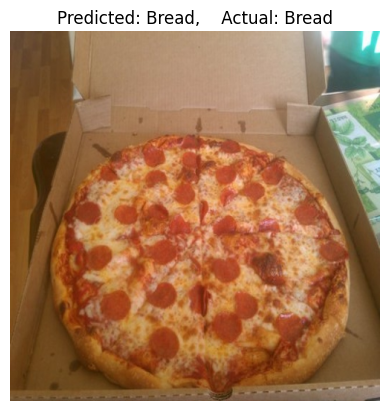

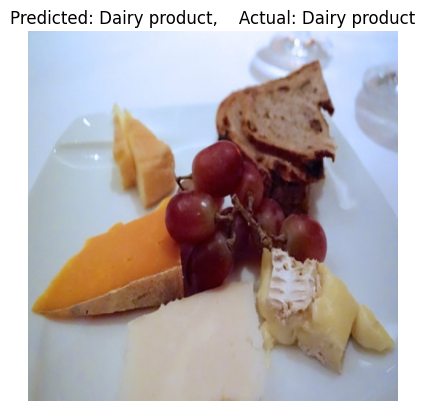

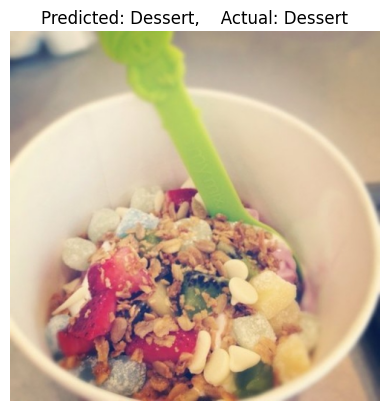

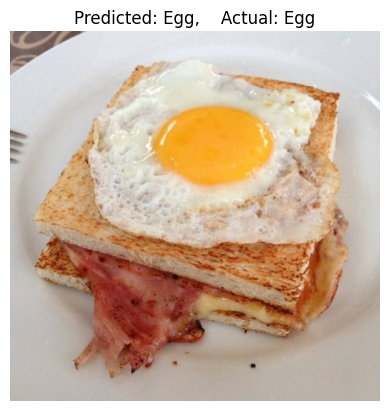

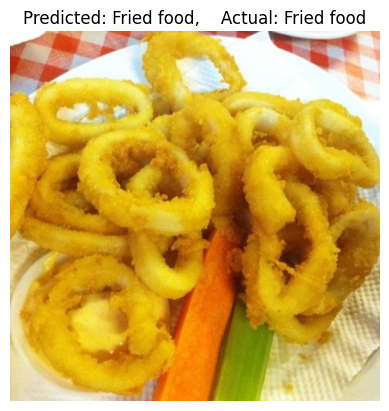

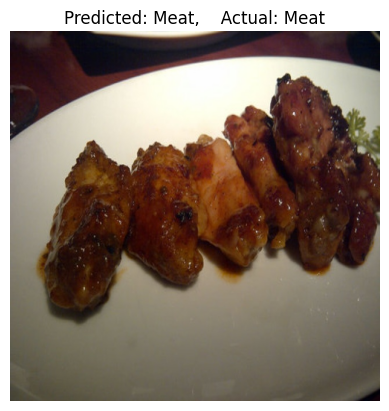

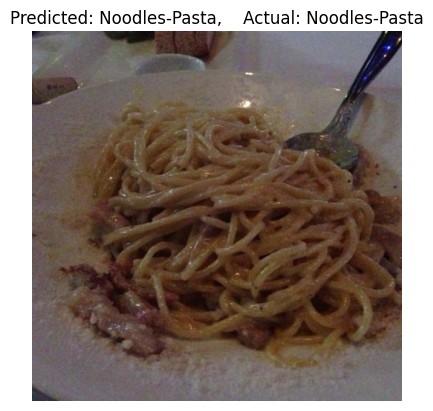

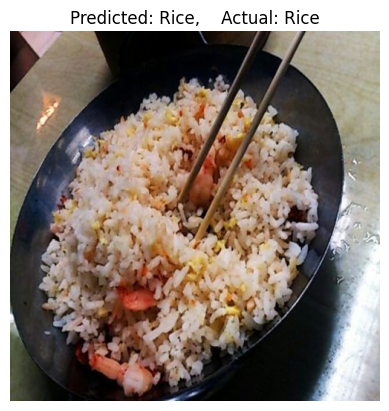

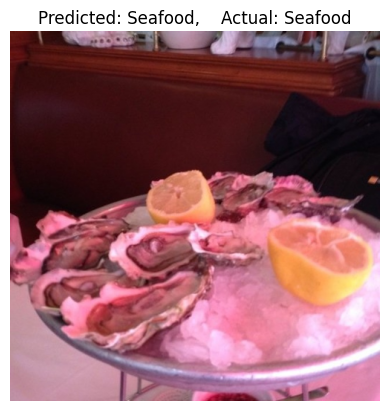

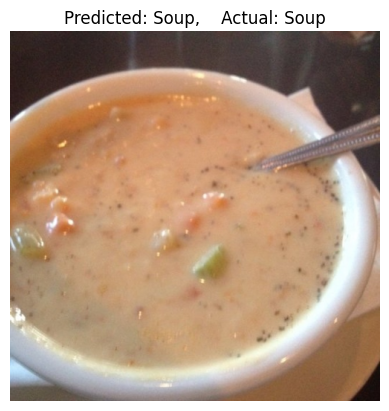

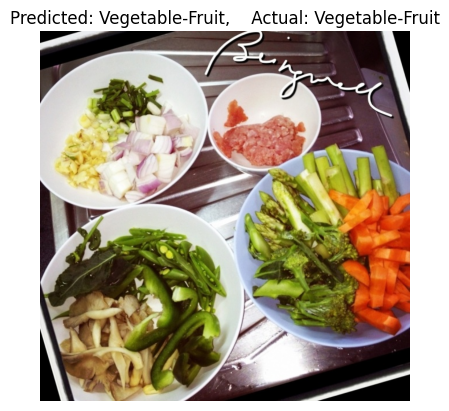

In [7]:
import os
import matplotlib.pyplot as plt
import random

test_path = "Food-11/test/"
test_folder = os.listdir(test_path)
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']
test_image_class = []

images = []
for food_class in test_folder:
  test_image_class.append(food_class)
  image_files = [f for f in os.listdir(test_path+"/"+food_class) if f.endswith('.jpg')]
  num_images = len(image_files)
  random_image_name = str(random.randint(1, num_images))
  image = test_path + "/" + food_class + "/" + random_image_name + ".jpg"
  images.append(image)

results = model(images)
for i in range(len(results)):
  plt.imshow(plt.imread(images[i]))
  plt.title(f"Predicted: {class_names[results[i].probs.top1]},    Actual: {test_image_class[i]}")
  plt.axis("off")
  plt.show()